In [74]:
import pandas as pd
%matplotlib inline

In [75]:
t_train = pd.read_csv("train.csv")[:600]
t_test = pd.read_csv("train.csv")[600:]
t_valid = pd.read_csv("test.csv")

## Analysis

In [76]:
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
t_train.info()
print(t_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
PassengerId    600 non-null int64
Survived       600 non-null int64
Pclass         600 non-null int64
Name           600 non-null object
Sex            600 non-null object
Age            474 non-null float64
SibSp          600 non-null int64
Parch          600 non-null int64
Ticket         600 non-null object
Fare           600 non-null float64
Cabin          137 non-null object
Embarked       599 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 56.3+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            126
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          463
Embarked         1
dtype: int64


In [78]:
t_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,600.000000,600.000000,600.000000,474.000000,600.000000,600.000000,600.000000
mean,300.500000,0.393333,2.308333,29.782700,0.538333,0.375000,31.846034
std,173.349358,0.488897,0.835320,14.535148,1.097210,0.773761,46.286301
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,150.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,300.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,450.250000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,600.000000,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


In [79]:
t_test.info()
print(t_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 600 to 890
Data columns (total 12 columns):
PassengerId    291 non-null int64
Survived       291 non-null int64
Pclass         291 non-null int64
Name           291 non-null object
Sex            291 non-null object
Age            240 non-null float64
SibSp          291 non-null int64
Parch          291 non-null int64
Ticket         291 non-null object
Fare           291 non-null float64
Cabin          67 non-null object
Embarked       290 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 27.4+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             51
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          224
Embarked         1
dtype: int64


In [80]:
t_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [81]:
y_train = t_train["Survived"]
x_train = t_train.drop(["PassengerId", "Survived", "Name", "Ticket", 
        "Cabin"], axis = 1)

analysis = t_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [82]:
# Check
# Adding "SibSp" and "Parch" columns to form "Family" column.

family = t_train[["SibSp", "Parch"]]
family.sum(axis=1)

# Printing shows both columns
# Want both columns in one

0      1
1      1
2      0
3      1
4      0
5      0
6      0
7      4
8      2
9      1
10     2
11     0
12     0
13     6
14     0
15     0
16     5
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     4
25     6
26     0
27     5
28     0
29     0
      ..
570    0
571    2
572    0
573    0
574    0
575    0
576    0
577    1
578    1
579    0
580    2
581    2
582    0
583    0
584    0
585    2
586    0
587    2
588    0
589    0
590    0
591    1
592    0
593    2
594    1
595    2
596    0
597    0
598    0
599    1
Length: 600, dtype: int64

In [95]:
y_test = t_test["Survived"]
x_test = t_test.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis = 1)

x_valid = t_valid.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

Survival in the training set

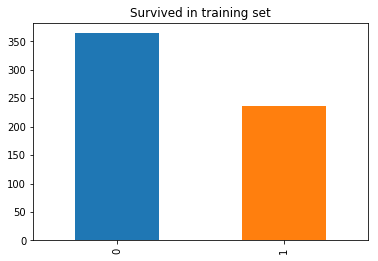

In [85]:
analysis["Survived"].value_counts().plot(kind="bar", title = "Survived in training set");

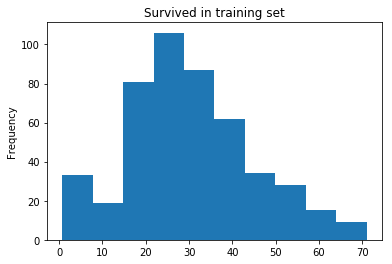

In [86]:
analysis["Age"].plot(kind="hist", title = "Survived in training set");

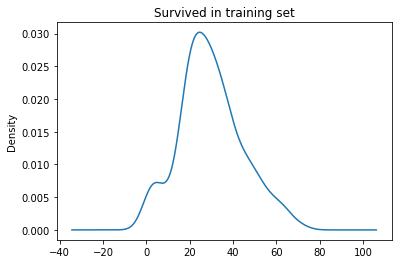

In [87]:
analysis["Age"].plot(kind="kde", title = "Survived in training set");

In [88]:
analysis["Sex"].value_counts()

male      377
female    223
Name: Sex, dtype: int64

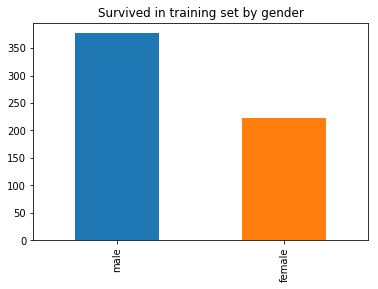

In [89]:
analysis["Sex"].value_counts().plot(kind="bar", title = "Survived in training set by gender");

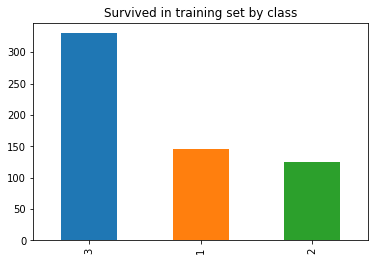

In [90]:
analysis["Pclass"].value_counts().plot(kind="bar", title = "Survived in training set by class");

In [91]:
analysis.groupby("Survived").mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.505495,30.773381,0.574176,0.318681,24.027895
1,2.004237,28.377551,0.483051,0.461864,43.904520


In [92]:
pd.pivot_table(data=analysis, index=["Survived", "Pclass"])

Age       Fare     Parch     SibSp
Survived Pclass                                          
0        1       43.867347  73.003600  0.338983  0.305085
         2       33.175439  19.150200  0.129032  0.322581
         3       26.247093  13.381189  0.362140  0.703704
1        1       34.841053  92.279360  0.441860  0.534884
         2       26.429322  20.363559  0.555556  0.396825
         3       22.209016  13.132615  0.413793  0.494253

In [93]:
pd.pivot_table(data=analysis, index=["Survived", "Embarked"])

Age       Fare     Parch    Pclass     SibSp
Survived Embarked                                                    
0        C         34.554054  37.238839  0.196429  2.142857  0.250000
         Q         30.363636  14.120259  0.206897  2.931034  0.620690
         S         30.184783  22.406062  0.354839  2.534050  0.634409
1        C         31.075000  77.328074  0.409836  1.573770  0.524590
         Q         22.500000  13.956672  0.000000  2.840000  0.320000
         S         27.666058  35.003607  0.563758  2.046980  0.496644

In [94]:
pd.crosstab(index=analysis["Survived"], 
        columns=[analysis["Pclass"], analysis["Sex"]])

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   56      4   58     49  194
1            62   24     50   13     55   32

## Base Classifier